In [1]:
import glob; import sys; import os
import pandas as pd
import numpy as np
import functions
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib.lines import Line2D
from matplotlib.legend import Legend


pd.options.mode.chained_assignment = None
plt.rcParams.update({'font.size': 20}) # Set a good font size

rsol2AU = 0.00465047 # solar radii to au

In [2]:
dataDict = functions.get_Started(Comparing=True)

Possible Directories:

0 : COMPAS_Output
1 : COMPAS_Output_1%sol_fallback
2 : COMPAS_Output_1%sol_noKicks
3 : COMPAS_Output_1%sol_reduced
4 : COMPAS_Output_1%_correctedEVO
5 : COMPAS_Output_1%_no_CHE
6 : COMPAS_Output_1%_pessCHE
7 : COMPAS_Output_alpha1_Z0.0001
8 : COMPAS_Output_largea_detailed
9 : COMPAS_Output_largea_detailed2
10 : COMPAS_Output_noBHKick_Z0.0001
11 : COMPAS_Output_noBHKick_Z0.001
12 : COMPAS_Output_noChem
13 : COMPAS_Output_PeTar_M100000
14 : COMPAS_Output_smalla_detailed
15 : COMPAS_Output_smalla_detailed2
16 : COMPAS_Output_sol_correctEVO
17 : COMPAS_Output_sol_no_CHE
18 : COMPAS_Output_SSE_Z0.00015
19 : COMPAS_Output_SSE_Z0.0015
20 : COMPAS_Output_test
21 : COMPAS_Output_test2
22 : COMPAS_Output_testSOL
23 : COMPAS_Output_Z0.0001
24 : COMPAS_Output_Z0.00015
25 : COMPAS_Output_Z0.0005
26 : COMPAS_Output_Z0.00075
27 : COMPAS_Output_Z0.001
28 : COMPAS_Output_Z0.0015
29 : COMPAS_Output_Z0.005
30 : COMPAS_Output_Z0.0075
31 : COMPAS_Output_Z0.01
32 : COMPAS_Output_Z0.01


What directory is the data stored in?    2,3,23



Currently selected datasets:
dict_keys(['1%sol_noKicks', '1%sol_reduced', 'Z0.0001'])


Are these all of the datasets to compare?[y/n] y


First fixing rho

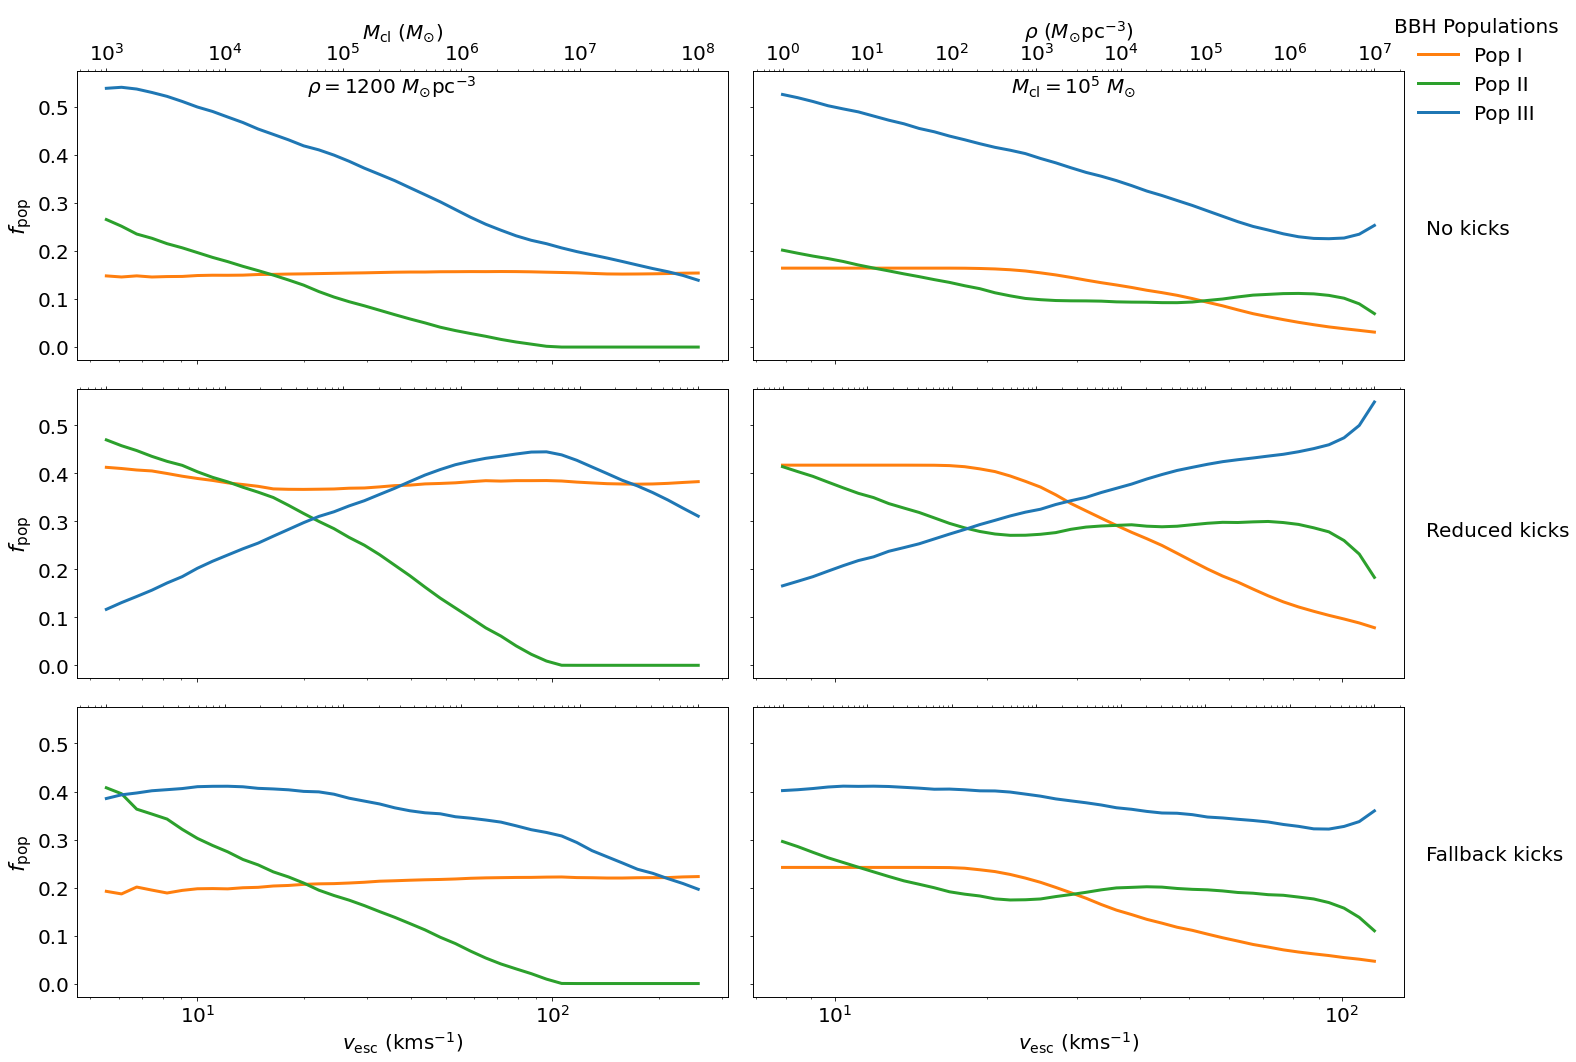

In [55]:
fig, ax = plt.subplots(3,2, figsize=(20,15), sharey=True, sharex=False)

count=0
secAxs=[]
for key, item in dataDict.items():
    v_esc_array, Mcl, pop1frac_simple, pop2frac_simple, pop3frac_simple, tot_bound, total_retained  = np.genfromtxt(os.path.join(item, 'fixrhoData.txt'), unpack=True)
    
    ax[count, 0].plot(v_esc_array, pop1frac_simple, color='tab:orange', linewidth=3)
    ax[count, 0].plot(v_esc_array, pop2frac_simple, color='tab:green', linewidth=3)
    ax[count, 0].plot(v_esc_array, pop3frac_simple, color='tab:blue', linewidth=3)
    
    ax[count, 0].set_xscale('log')
    
    
    # Making the secondary axis for every plot
    ax1_ = ax[count, 0].twiny()
    ax1_.plot(Mcl, pop3frac_simple, alpha=0)
    
    ax1_.set_xscale('log')
    
    secAxs.append(ax1_)
    
    if count<2:
        ax[count,0].tick_params(labelbottom=False)
        
    if count>0:
        ax1_.tick_params(labeltop=False)
    count+=1

ax[2,0].set_xlabel('$v_{\mathrm{esc}}$ (kms$^{-1}$)')

secAxs[0].set_xlabel('$M_{\mathrm{cl}} \ (M_{\odot })$')
secAxs[0].text(5e4, 0.53, '$\\rho = 1200 \ M_{\odot}$pc$^{-3}$')


######### NOW WE FIX MCL ############

rho_array = np.logspace(0, 7, len(v_esc_array))
count=0
secAxs2=[]
for key, item in dataDict.items():
    v_esc_array, Mcl, pop1frac_simple, pop2frac_simple, pop3frac_simple, tot_bound, total_retained  = np.genfromtxt(os.path.join(item, 'fixMclData.txt'), unpack=True)
    
    ax[count, 1].plot(v_esc_array, pop1frac_simple, color='tab:orange', linewidth=3)
    ax[count, 1].plot(v_esc_array, pop2frac_simple, color='tab:green', linewidth=3)
    ax[count, 1].plot(v_esc_array, pop3frac_simple, color='tab:blue', linewidth=3)
    
    ax[count, 1].set_xscale('log')
    
    # Making the secondary axis for every plot
    ax2_ = ax[count, 1].twiny()
    ax2_.plot(rho_array, pop3frac_simple, alpha=0)
    
    ax2_.set_xscale('log')
    
    secAxs2.append(ax2_)
    
    if count<2:
        ax[count,1].tick_params(labelbottom=False)

    if count>0:
        ax2_.tick_params(labeltop=False)
    count+=1

ax[2,1].set_xlabel('$v_{\mathrm{esc}}$ (kms$^{-1}$)')

secAxs2[0].set_xlabel('$\\rho$ $(M_{\odot}$pc$^{-3})$')
secAxs2[0].text(5e2, 0.53, '$M_{\mathrm{cl}} = 10^{5} \ M_{\odot}$')

# legend 1
popline = [Line2D([0],[0], color='tab:orange', linewidth=3),
           Line2D([0],[0], color='tab:green', linewidth=3),
           Line2D([0],[0], color='tab:blue', linewidth=3)]
leg1 = Legend(fig, popline, labels=['Pop I', 'Pop II', 'Pop III'], title='BBH Populations', frameon=False, loc='upper right', ncol=1)
ax[0,0].add_artist(leg1)


ax[0,0].set_ylabel('$f_{\mathrm{pop}}$', fontsize=22)
ax[1,0].set_ylabel('$f_{\mathrm{pop}}$', fontsize=22)
ax[2,0].set_ylabel('$f_{\mathrm{pop}}$', fontsize=22)

fig.text(1, 0.78, 'No kicks')
fig.text(1, 0.5, 'Reduced kicks')
fig.text(1, 0.2, 'Fallback kicks')


fig.tight_layout()

In [56]:
fig.savefig('ComparingKicks.pdf', dpi=200, bbox_inches = "tight")